In [1]:
!ln -s /data /habitat-api/data

ln: failed to create symbolic link '/habitat-api/data/data': File exists


In [2]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install sklearn
!pip install --upgrade wandb

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Requirement already up-to-date: wandb in /opt/conda/lib/python3.7/site-packages (0.8.26)


In [3]:
!wandb login 

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [4]:
import habitat
import numpy as np
from tqdm.notebook import tqdm, trange
import torch
import matplotlib.pyplot as plt
import random
import torch.nn as nn
# from tensorboardX import SummaryWriter
from Vec_env import create_envs
from Utils import AverageMeter, DepthNorm
from Data import getTrainTestData
from Model_dense import Model
from Loss import ssim
import wandb
import os

In [5]:
%cd ../../habitat-api/
%ls

/habitat-api
CODE_OF_CONDUCT.md  README.md  habitat/            res/
CONTRIBUTING.md     configs/   habitat.egg-info/   setup.cfg
Dockerfile          data@      habitat_baselines/  setup.py
LICENSE             docs/      pyproject.toml      test/
MANIFEST.in         examples/  requirements.txt


#### Create vector of envs for parallel online training

In [6]:
config = habitat.get_config(config_paths='configs/tasks/pointnav_gibson.yaml')
config.defrost()
#config.DATASET.DATA_PATH = 'data/datasets/pointnav/gibson/v1/val/val.json.gz'
config.SIMULATOR.AGENT_0.SENSORS = ['RGB_SENSOR',  'DEPTH_SENSOR']
config.freeze()
envs = create_envs(1, config)

2020-02-11 14:26:30,378 Initializing dataset PointNav-v1
2020-02-11 14:26:30,404 initializing sim Sim-v0
I0211 14:26:31.506450 244 simulator.py:142] Loaded navmesh data/scene_datasets/gibson/Eudora.navmesh
2020-02-11 14:26:31,515 Initializing task Nav-v0
2020-02-11 14:37:13,322 Worker KeyboardInterrupt


#### Create net

In [7]:
net = Model()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)
print(device)

cuda:0


#### Import datasets

In [9]:
batch_size = 8
train_data, test_data = getTrainTestData(batch_size, 'data/My_data')

Loading dataset Loaded (20804)
Loading dataset Loaded (10996)


In [10]:
# Logging
wandb.init(project="mapper", entity='stepan-makarenko')
wandb.watch(net)

#### Train on collected dataset

Epoch: [0][0/2601] : train_loss = 1.9035 (1.9035)



Epoch: [0][0/2601] : test_loss = 6168.8782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: [0][5/2601] : train_loss = 1.8188 (1.9463)
Epoch: [0][10/2601] : train_loss = 0.6736 (1.8395)
Epoch: [0][15/2601] : train_loss = 1.5645 (1.7196)
Epoch: [0][20/2601] : train_loss = 1.1336 (1.1178)
Epoch: [0][25/2601] : train_loss = 1.0153 (1.1334)
Epoch: [0][30/2601] : train_loss = 1.3909 (1.2769)
Epoch: [0][35/2601] : train_loss = 1.0941 (1.0610)
Epoch: [0][40/2601] : train_loss = 1.1838 (1.2001)
Epoch: [0][45/2601] : train_loss = 1.3464 (1.2827)
Epoch: [0][50/2601] : train_loss = 1.5116 (1.4339)
Epoch: [0][55/2601] : train_loss = 0.7120 (1.0049)
Epoch: [0][60/2601] : train_loss = 0.9914 (1.2389)
Epoch: [0][65/2601] : train_loss = 1.2347 (0.9848)
Epoch: [0][70/2601] : train_loss = 0.5807 (0.9113)
Epoch: [0][75/2601] : train_loss = 1.0508 (0.8642)
Epoch: [0][80/2601] : train_loss = 0.7861 (0.8011)
Epoch: [0][85/2601] : train_loss = 1.0271 (1.2302)
Epoch: [0][90/2601] : train_loss = 1.2230 (1.1499)
Epoch: [0][95/2601] : train_loss = 1.3870 (1.1516)
Epoch: [0][100/2601] : train_los


Epoch: [0][300/2601] : test_loss = 6.1658
Epoch: [0][305/2601] : train_loss = 1.1097 (0.8272)
Epoch: [0][310/2601] : train_loss = 1.2927 (1.0617)
Epoch: [0][315/2601] : train_loss = 0.9031 (0.9379)
Epoch: [0][320/2601] : train_loss = 0.7622 (0.7695)
Epoch: [0][325/2601] : train_loss = 1.5455 (1.2980)
Epoch: [0][330/2601] : train_loss = 1.1226 (1.2874)
Epoch: [0][335/2601] : train_loss = 0.7503 (0.9937)
Epoch: [0][340/2601] : train_loss = 1.0984 (0.7200)
Epoch: [0][345/2601] : train_loss = 1.1115 (1.0755)
Epoch: [0][350/2601] : train_loss = 1.3402 (1.0066)
Epoch: [0][355/2601] : train_loss = 0.6311 (0.8507)
Epoch: [0][360/2601] : train_loss = 1.4689 (1.0243)
Epoch: [0][365/2601] : train_loss = 0.6831 (1.3470)
Epoch: [0][370/2601] : train_loss = 1.3266 (0.9698)
Epoch: [0][375/2601] : train_loss = 1.2745 (0.8924)
Epoch: [0][380/2601] : train_loss = 1.6580 (0.9619)
Epoch: [0][385/2601] : train_loss = 1.6644 (1.1470)
Epoch: [0][390/2601] : train_loss = 0.5909 (0.9265)
Epoch: [0][395/2601] 

KeyboardInterrupt: 

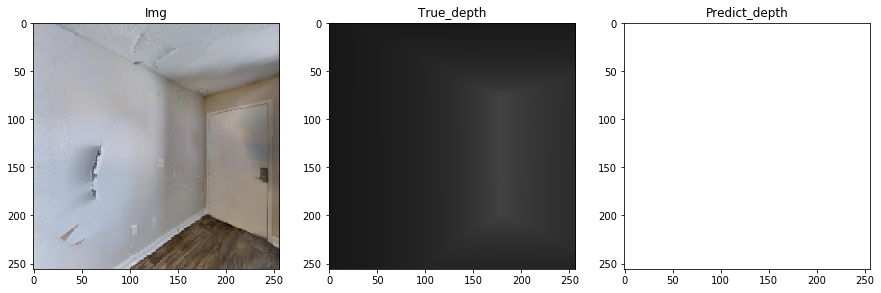

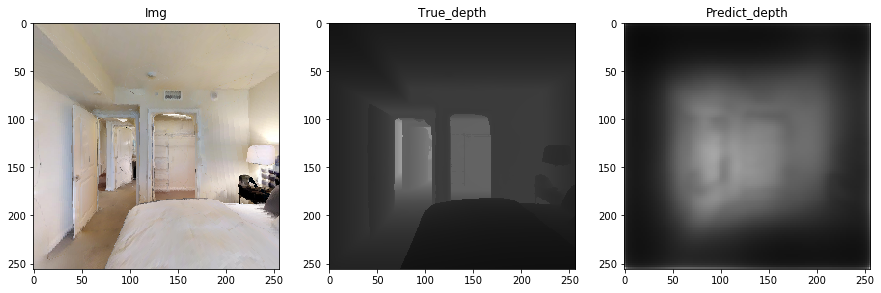

In [10]:
# import copy

def train(net, train_loader, test_loader):
    
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    N = len(train_loader)
    
    net.to(device)
    losses_train = AverageMeter()
    losses_test = AverageMeter()
    
    best_test_loss = float(np.inf)
#     best_model = copy.deepcopy(net)
        
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.999))
    l1_criterion = nn.L1Loss()
    
    for epoch in trange(80):
        
        for i, sample_batched in tqdm(enumerate(train_loader)):

            # Prepare sample and target
            image = torch.autograd.Variable(sample_batched['image'].to(device))
            depth = torch.autograd.Variable(sample_batched['depth'].to(device, non_blocking=True))

            # Normalize depth
            depth_n = DepthNorm(depth)
            
            optimizer.zero_grad()
            net.train()
            
            output = net.forward(image)
            output = nn.functional.interpolate(output, (256, 256))
            
            l_depth = l1_criterion(output, depth_n)
            l_ssim = torch.clamp((1 - ssim(output, depth_n, val_range = 1000.0 / 10.0)) * 0.5, 0, 1)
            loss = (1.0 * l_ssim) + (0.1 * l_depth)
            losses_train.update(loss.data.item(), image.size(0))
            
            loss.backward()
            optimizer.step()
            
            # Log progress
            niter = epoch*N+i
            if i % 5 == 0:
                # Print to console
                print('Epoch: [{0}][{1}/{2}] : train_loss = {loss.val:.4f} ({loss.avg:.4f})'.format(epoch, i, N, loss=losses_train))
                
                # Log to WB
                wandb.log({'Iteration': niter, 'Train loss': losses_train.val})
                
                losses_train.reset()
            
            if i % 300 == 0:
                with torch.no_grad():
                    net.eval()
                    for j, sample_batched in tqdm(enumerate(test_loader)):
                        optimizer.zero_grad()

                        # Prepare sample and target
                        image = torch.autograd.Variable(sample_batched['image'].to(device))
                        depth = torch.autograd.Variable(sample_batched['depth'].to(device, non_blocking=True))

                        # Normalize depth                
                        output = DepthNorm(net.forward(image))
                        output = nn.functional.interpolate(output, (256, 256))

                        l_depth = l1_criterion(output, depth)
                        l_ssim = torch.clamp((1 - ssim(output, depth, val_range = 1000.0 / 10.0)) * 0.5, 0, 1)
                        loss = (1.0 * l_ssim) + (0.1 * l_depth)
                        losses_test.update(loss.data.item(), image.size(0))

                    if losses_test.avg < best_test_loss:
#                         torch.save(net.state_dict(), os.path.join(wandb.run.dir, 'model.pt'))
                        torch.save(net.state_dict(), "model.pt")
                        wandb.save('model.pt')
#                         torch.save(net.state_dict(), 'best_net.pt')
#                         best_model = copy.deepcopy(net)
                        best_test_loss = losses_test.avg
                        
                    # Print to console
                print('Epoch: [{0}][{1}/{2}] : test_loss = {loss.avg:.4f}'.format(epoch, i, N, loss=losses_test))

                # Log to WB
                wandb.log({'Iteration': niter, 'Test loss': losses_test.avg})
                
                ### Image save
                scen_num = np.random.randint(batch_size)
                for d in test_data:
                    x = d['image'][scen_num]
                    y = d['depth'][scen_num] / 1000
                    x = x.permute(1,2,0)
                    y = y.permute(1,2,0)
                    break
                    
                d = d['image'].to(device)
                my_depth=net.forward(d)
                my_depth = nn.functional.interpolate(my_depth, (256, 256))
                my_depth = my_depth.permute(0, 2, 3, 1)
                my_depth_numpy = my_depth.cpu().detach().numpy()[scen_num]

                fig = plt.figure(figsize=(15,15))
                a = fig.add_subplot(1, 3, 1)
                imgplot = plt.imshow(x)
                a.set_title('Img')
                a = fig.add_subplot(1, 3, 2)
                imgplot = plt.imshow(np.concatenate((y, y, y), axis=2))
                a.set_title('True_depth')
                a = fig.add_subplot(1, 3, 3)
                imgplot = plt.imshow(np.concatenate((1/my_depth_numpy, 1/my_depth_numpy, 1/my_depth_numpy), axis=2))
                a.set_title('Predict_depth')

                wandb.log({'Iteration': niter, 'Example depth': wandb.Image(fig)})
                ###
                
                losses_test.reset()
            

    return net

net = train(net, train_data, test_data)

#### Create pretrained ppo agent to perform actions in environment


In [11]:
from habitat_baselines.agents.ppo_agents import PPOAgent, get_default_config
agent_config = get_default_config()
agent_config.INPUT_TYPE = "rgbd"
agent_config.MODEL_PATH = "./data/agents/rgbd.pth"
agent = PPOAgent(agent_config)
agent.reset()

/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

#### Define training loop and helpfull augmentations

In [12]:
def train(net, X_train, y_train, losses_train, epoch):
        
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-5, betas=(0.9, 0.999))
    l1_criterion = nn.L1Loss()
    
    ###Train loop
    for i in range(epoch):
        optimizer.zero_grad()
        net.train()

        image = torch.autograd.Variable(X_train.to(device))
        depth = torch.autograd.Variable(y_train.to(device, non_blocking=True))

        # Normalize depth
        depth_n = DepthNorm(depth)

        output = net.forward(image)
        output = nn.functional.interpolate(output, (256, 256))

        l_depth = l1_criterion(output, depth_n)
        l_ssim = torch.clamp((1 - ssim(output, depth_n, val_range = 1000.0 / 10.0)) * 0.5, 0, 1)
        loss = (1.0 * l_ssim) + (0.1 * l_depth)
        losses_train.update(loss.data.item(), image.size(0))

        loss.backward()
        optimizer.step()
    
    ###
    return net, losses_train

class RandomHorizontalFlip:
    def __call__(self, sample):
        image, depth = sample['rgb'], sample['depth']
        
        if random.random() < 0.5:
            image = np.flip(image, 1)
            depth = np.flip(depth, 1)
        
        return {'rgb': image, 'depth': depth}

class RandomChannelSwap:
    def __init__(self, probability):
        from itertools import permutations
        self.probability = probability
        self.indices = list(permutations(range(3), 3))
    
    def __call__(self, sample):
        image, depth = sample['rgb'], sample['depth']

        if random.random() < self.probability:
            image = image[...,list(self.indices[random.randint(0, len(self.indices) -1)])]
        
        return {'rgb': image, 'depth': depth}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



epoch 0 : test_loss = 2583.2423586382265
epoch 7 : train_loss = 2.2833807468414307
epoch 15 : train_loss = 1.1312317252159119
epoch 23 : train_loss = 1.5039329528808594
epoch 31 : train_loss = 1.583720862865448
epoch 39 : train_loss = 1.1859877109527588
epoch 47 : train_loss = 1.218049943447113
epoch 55 : train_loss = 1.2183533906936646
epoch 63 : train_loss = 1.2375321984291077
epoch 71 : train_loss = 1.2025877833366394
epoch 79 : train_loss = 1.2140369415283203
epoch 87 : train_loss = 1.22957843542099
epoch 95 : train_loss = 1.2179752588272095
epoch 103 : train_loss = 1.2261945009231567
epoch 111 : train_loss = 1.2125425934791565
epoch 119 : train_loss = 1.182603359222412
epoch 127 : train_loss = 1.2110381722450256
epoch 135 : train_loss = 1.211429476737976
epoch 143 : train_loss = 1.1970826983451843
epoch 151 : train_loss = 1.1802133321762085
epoch 159 : train_loss = 1.1519028544425964
epoch 167 : train_loss = 1.1607560515403748
epoch 175 : train_loss = 1.119520366191864
epoch 183 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


epoch 300 : test_loss = 19.872189456916107
epoch 303 : train_loss = 0.2825963646173477
epoch 311 : train_loss = 1.0646317601203918
epoch 319 : train_loss = 1.3968232870101929
epoch 327 : train_loss = 0.5043589919805527
epoch 335 : train_loss = 0.48000049591064453
epoch 343 : train_loss = 0.7134649753570557
epoch 351 : train_loss = 0.7202862203121185
epoch 359 : train_loss = 0.5316245555877686
epoch 367 : train_loss = 0.6188183128833771
epoch 375 : train_loss = 1.2395164966583252
epoch 383 : train_loss = 1.4620370864868164
epoch 391 : train_loss = 2.7251421213150024
epoch 399 : train_loss = 1.1187704205513
epoch 407 : train_loss = 1.0849429965019226


KeyboardInterrupt: 

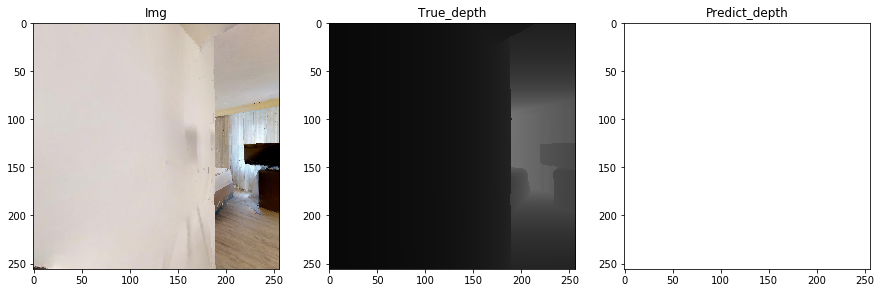

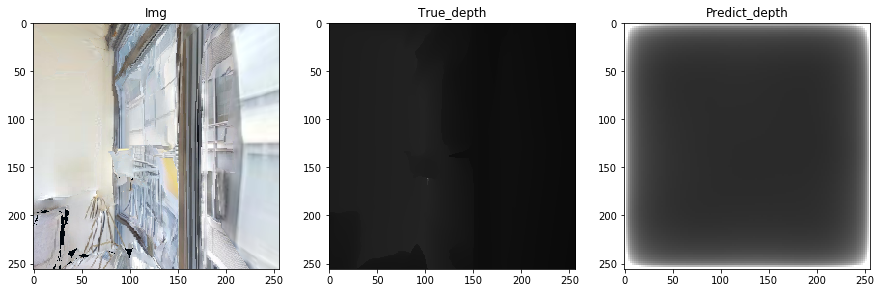

In [13]:
observations = envs.reset()

X_train = []
y_train = []
epoch = 2


l1_criterion = nn.L1Loss()
losses_train = AverageMeter()
losses_test = AverageMeter()
best_test_loss = float(np.inf)

for i in tqdm(range(1000000)):
    
    
    actions = []
    for observ in observations: 
        action = agent.act(observ)
        actions.append(action['action'])
        
        observ = RandomChannelSwap(0.5)(RandomHorizontalFlip()(observ))
        observ['depth'] = np.clip(observ['depth'] * 1000, 10, 1000)
        
        X_train.append(np.swapaxes(observ['rgb'],0,1)/255)
        y_train.append(np.swapaxes(observ['depth'],0,1))

    if (i + 1) % 8 == 0:
        X_train = torch.FloatTensor(X_train).permute(0, 3, 2, 1)
        y_train = torch.FloatTensor(y_train).permute(0, 3, 2, 1)
        
        
        net, losses_train = train(net, X_train, y_train, losses_train, epoch)

        ###
        if i % 2 == 1:
            print('epoch {} : train_loss = {}'.format(i, losses_train.avg))
            wandb.log({'Iteration': i, 'Online train loss': losses_train.val})
        
        losses_train.reset()
        X_train = []
        y_train = []
        
    if (i) % 300 == 0:
        with torch.no_grad():
            net.eval()

            for sample_batched in tqdm(test_data):
            
                image = torch.autograd.Variable(sample_batched['image'].to(device))
                depth = torch.autograd.Variable(sample_batched['depth'].to(device, non_blocking=True))

                # Normalize depth

                output = DepthNorm(net.forward(image))
                output = nn.functional.interpolate(output, (256, 256))
                
                l_depth = l1_criterion(output, depth)
                l_ssim = torch.clamp((1 - ssim(output, depth, val_range = 1000.0 / 10.0)) * 0.5, 0, 1)
                loss = (1.0 * l_ssim) + (0.1 * l_depth)
                losses_test.update(loss.data.item(), image.size(0))
                
            ### Image save

            scen_num = np.random.randint(batch_size)
            for d in test_data:
                x = d['image'][scen_num]
                y = d['depth'][scen_num] / 1000
                x = x.permute(1,2,0)
                y = y.permute(1,2,0)
                break

            d = d['image'].to(device)
            my_depth = net.forward(d)
            my_depth = nn.functional.interpolate(my_depth, (256, 256))
            my_depth = my_depth.permute(0, 2, 3, 1)
            my_depth_numpy = my_depth.cpu().detach().numpy()[scen_num]

            fig = plt.figure(figsize=(15,15))
            a = fig.add_subplot(1, 3, 1)
            imgplot = plt.imshow(x)
            a.set_title('Img')
            a = fig.add_subplot(1, 3, 2)
            imgplot = plt.imshow(np.concatenate((y, y, y), axis=2))
            a.set_title('True_depth')
            a = fig.add_subplot(1, 3, 3)
            imgplot = plt.imshow(np.concatenate((1/my_depth_numpy, 1/my_depth_numpy, 1/my_depth_numpy), axis=2))
            a.set_title('Predict_depth')
            
            wandb.log({'Iteration': i, 'Online example depth': wandb.Image(fig)})

            ###
        print('epoch {} : test_loss = {}'.format(i, losses_test.avg))
        wandb.log({'Iteration': i, 'Online test loss': losses_test.avg})

        if losses_test.avg < best_test_loss:
            torch.save(net.state_dict(), "online_model.pt")
            wandb.save('online_model.pt')
            best_test_loss = losses_test.avg
        losses_test.reset()
    
    actions = np.array(actions)
    actions = (actions + 1) % 4
    observations = envs.step(actions)